# C0TB1060 蒲原紳乃輔

# **課題レポート**
今回のレポートの題材は大きく3つある。一つ目はdigitsデータ以外のデータを扱ってみた。二つ目はデータをわかりやすく可視化する工夫をしてみた。最後にdigitsデータの分類を機械学習のアルゴリズムを用いて処理してみた。これは次回以降の予習であろう

## 1.iris digits以外のデータを触ってみる
前回と今回でscikit-learnのデータセットにあるirisデータとdigitsデータを扱ったが、他にもデータセットが格納されているので、せっかくなので見てみようと思う。

### Boston house price datasets
ボストン郊外における地域別の住宅価格のデータセットである。以下このデータセットについて見てみよう

In [7]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

データの構造としてはdigitsと同じdictionaryの中にデータが格納されているようである。
`{'data':array(...),'feature_names':array(...),'file_name':'...csv','target':array()}`

データとして扱う部分はdataとtargetであるのでそれらを抽出する

In [8]:
x = boston['data'] #boston.dataでもよい
y = boston['target'] #boston.targetでもよい

#xのデータの型とサイズ
print("type of x: ",type(x))
print("size of x: ",x.shape)
#yのデータの型とサイズ
print("type of y: ",type(y))
print("size of y;",y.shape)

type of x:  <class 'numpy.ndarray'>
size of x:  (506, 13)
type of y:  <class 'numpy.ndarray'>
size of y; (506,)


xは特徴量13のnumpy arrayであり、x と yはデータ数506個である

次にデータセットの説明を見てみる

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

説明変数と目的変数について上の通りである \

**説明変数** \
1.CRIM 人口一人当たりの犯罪率 \
2.ZN 25,000平方フィート以上の住居区画の占める割合 \
3.INDUS 小売業者以外の商業が占める面積の割合 \
4.CHAS チャールズ川によるダミー変数（1:川の周辺、0:それ以外 \
5.NOX 酸化窒素の濃度 \
6.RM 住宅の部屋数 \
7.AGE 1940年より前に建てられた物件の割合 \
8.DIS 5つのボストン市の雇用施設からの距離（重み付け済）\
9.RAD 環状高速道路へのアクセスしやすさ \
10.TAX $10,000ドルあたりの不動産税率の総計 \
11.PTRATIO 町毎の児童と教師の比率 \
12.B 町毎の黒人（Bk）の比率 \
13.LSTAT 低所得者の割合 \

**目的変数** \
MEDV 1,000ドル台でオーナーが所有する住宅の価格の中央値

説明変数を確認するためにはboston['feature_names']とすればよい

In [10]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

このデータセットは住宅価格と13個の説明変数でどのような相関があるか調べるためのものである。最後に13個の特徴量と目的変数との相関性を見るためにデータを2次元平面に一つずつプロットする

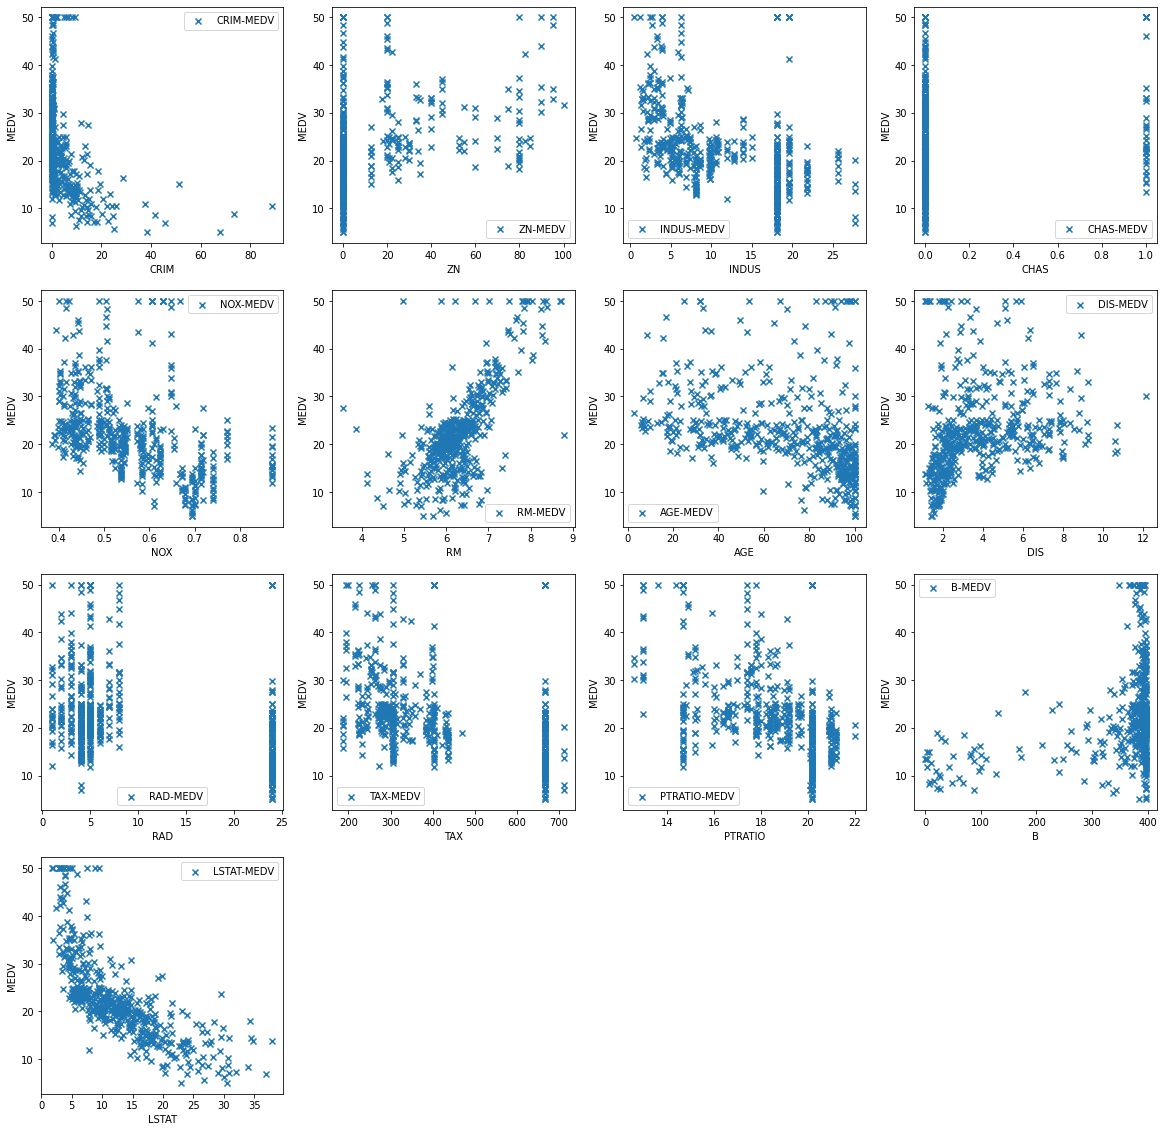

In [11]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20))
for i in range(13):
  plt.subplot(4,4,i+1)
  plt.scatter(x[:,i],y,marker='x',label=boston.feature_names[i]+"-MEDV")
  plt.legend(loc="best")
  plt.xlabel(boston.feature_names[i])
  plt.ylabel("MEDV")
plt.show()

図を見た感じ相関があるものはRMとLSTATあたりのみであろうか。他はデータの分布が極端すぎて相関性の判断がつかない。ちゃんと数式的に示すのであれば、前回のレポートの題材にした次元削減を使うとよい。どの説明変数がデータをどのくらい説明しているかを表す指標（寄与率と呼ばれる）を計算すればよい。今回はそれらを行うことは本質ではない

### Breast cancer wisconsin [diagnostic] dataset
乳がんの診断結果がまとめられたデータであり、説明変数に対して、目的変数として良性or悪性の2通りのデータが格納されている。

In [12]:
from sklearn.datasets import load_breast_cancer
import numpy as np 

breast_cancer = load_breast_cancer()
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

データの構造としてはdigits bostonと同じdictionaryの中にデータが格納されているようである。
`{'data':array(...),'feature_names':array(...),'file_name':'...csv','target':array(...),'target_names':array(...)}`

扱うデータを変数として抽出する

In [13]:
x = breast_cancer['data'] #breast_cancer.dataでもよい
y = breast_cancer['target'] #breast_cancer.targetでもよい
#データの型とサイズを表示させる
print("type of x :",type(x))
print("size of x ;",x.shape)
print("type of y :",type(y))
print("size of y :",y.shape)

type of x : <class 'numpy.ndarray'>
size of x ; (569, 30)
type of y : <class 'numpy.ndarray'>
size of y : (569,)


xは569行30列のnumpy行列(データ数569個 特徴量30個）\
yは当然569個の値を含んだ列ベクトル。次にデータセットの説明を見てみる

In [14]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

図としてはこのようなものがあるらしい
参考：https://ui.adsabs.harvard.edu/abs/1993SPIE.1905..861S/abstract \
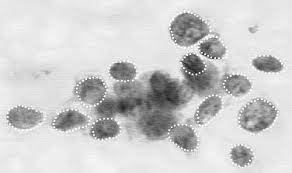

bostonデータと違い、breast_cancerデータは特徴量が30個とやや多い。\
説明変数
1. mean radius 平均半径
2. mean texture テクスチャをグレースケールにした際の平均
3. mean perimeter 平均外周の長さ
4. mean area 平均面積
5. mean smoothness 平均なめらかさ（半径の分散）
6. mean compactness 外周長さ^2 / 面積 - 1.0で示すコンパクトさ平均
7. mean concavity 輪郭の凹部の重要度の平均
8. mean concave points 輪郭の凹部の数の平均
9. mean symmetry 対称性
10. mean fractal dimension フラクタル次元の平均
11. radius error 半径誤差
12. texture error テクスチャの誤差
13. perimeter error 外周の誤差
14. area error 面積の誤差
15. smoothness error なめらかさの誤差
16. compactness error コンパクトさの誤差
17. concavity error 輪郭の凹部の重要度の誤差
18. concave points error 輪郭の凹部の数の誤差
19. symmetry error 対称性の誤差
20. fractal dimension error フラクタル次元の誤差
21. worst radius 半径最悪値
22. worst texture テクスチャ最悪値
23. worst perimeter 外周の長さ最悪値
24. worst area 面積の最悪値
25. worst smoothness なめらかさの最悪値
26. worst compactness コンパクトさの最悪値
27. worst concavity 輪郭の凹部の重要度の最悪値
28. worst concave points 輪郭の凹部の数の最悪値
29. worst symmetry 対称性の最悪値
30. worst fractal dimension フラクタル次元の最悪値

目的変数 \
malignant : 悪性 \
benign : 良性


説明変数と目的変数の名前を出力してみる

In [15]:
print("feature_names: ",breast_cancer['feature_names'])
print("")
print("target_names: ",breast_cancer['target_names'])

feature_names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

target_names:  ['malignant' 'benign']


最後にいくつかの特徴データを二次元平面にプロットする

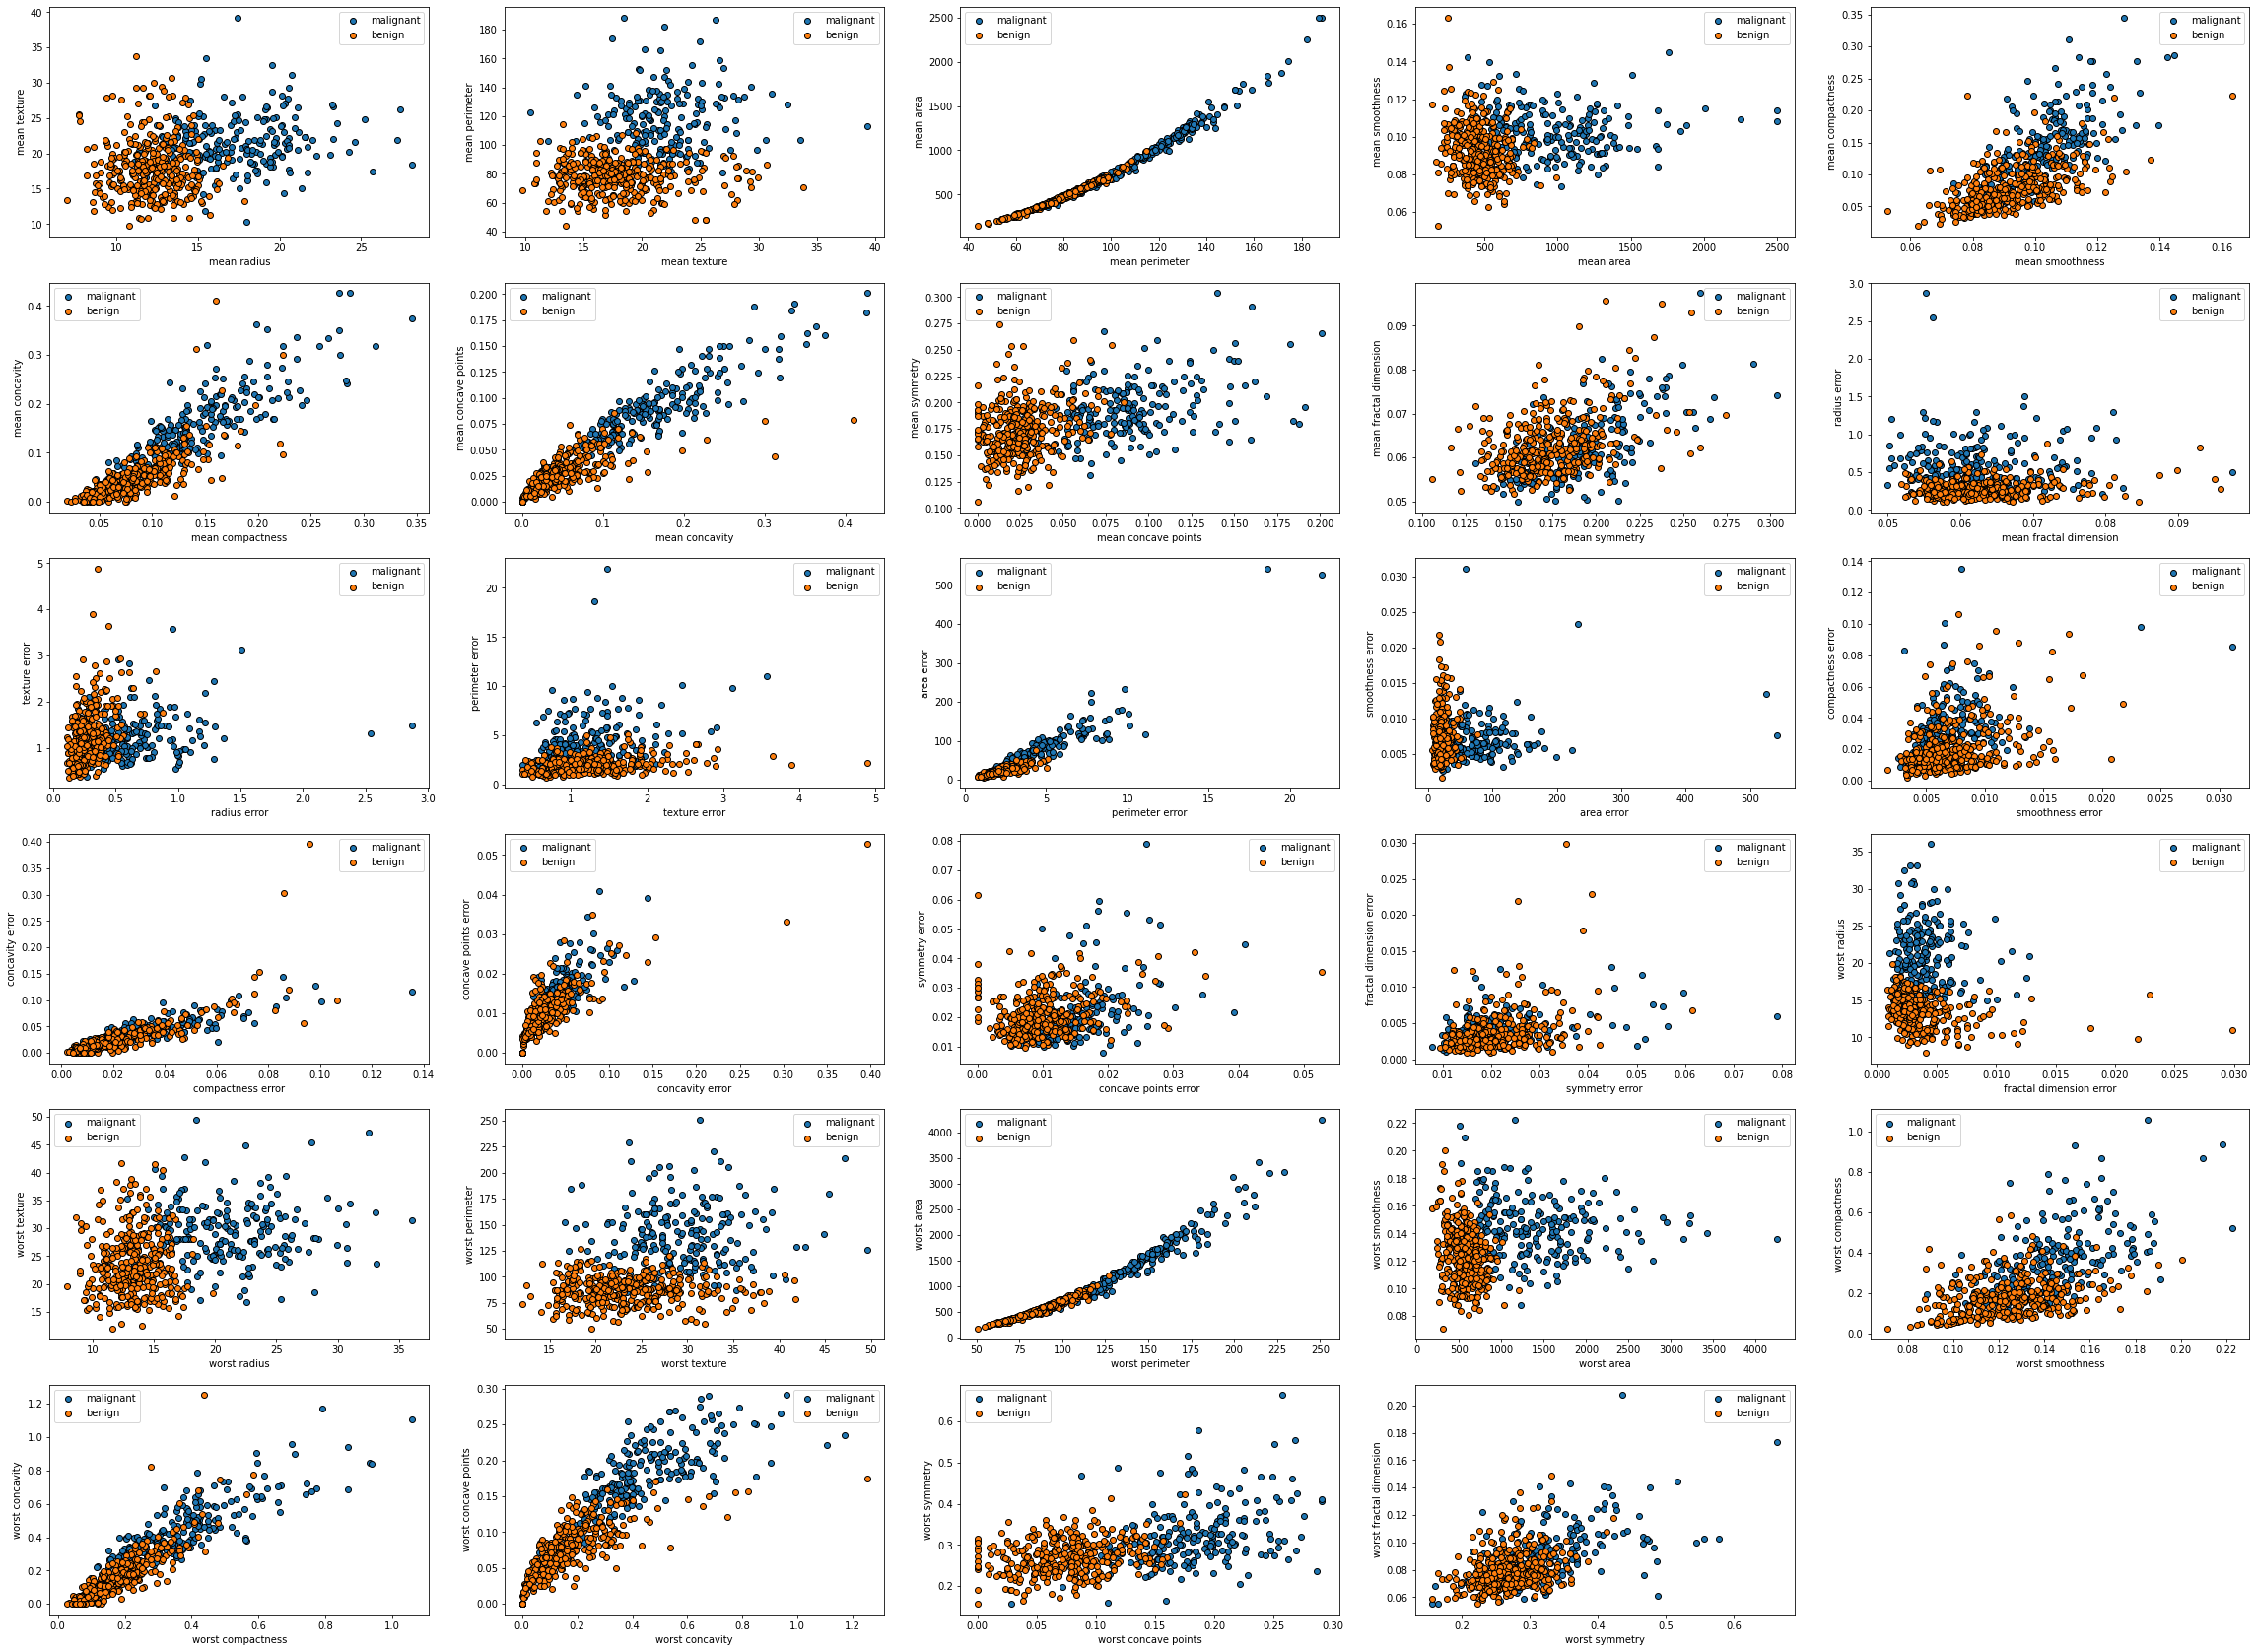

In [25]:
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

plt.figure(figsize=(40,30))

for i in range(29):
  plt.subplot(6,5,i+1)
  for label in np.unique(y):
    plt.scatter(x[y==label][:,i],x[y==label][:,i+1],edgecolors='black',label=target_names[label])
    plt.legend(loc="best")
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[i+1])

plt.show()

データの特徴量が30個あるので全ての組み合わせをプロットすると900個もグラフを作成しなければいけないので今回は29個にしぼった。特徴量によって分離できそうなデータと分離できないようなデータがある。実際データ分析を行うとき、全部のデータを用いて学習を行わなくとも、重要なデータに絞って分析する手法がある（前回扱った次元削減）。それについては次回以降のレポートで扱ってみようと思う。

## 2.Digitsデータの可視化プログラム

### 普通に可視化
plt.imshow()のdefaultで数字を可視化してみる

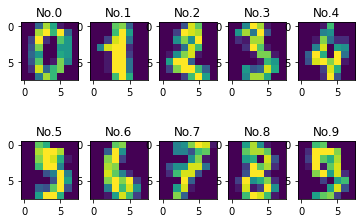

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt 

digits = datasets.load_digits()
x = digits.data
y = digits.target

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x[i].reshape(8,8))
  plt.title("No."+str(i))
plt.show()

### 工夫して可視化
上で可視化した手書き数字は、改造度が低いため、大きく表示してもその数字がなんだかわからない。したがって、各数字を小さく可視化して、色も変えてみるとうまく見えるようになるかもしれない。具体的には、`matplotlib.pyplot.imshow`には、`cmap`という引数が用意されており、これで色を変えることができる。今回は、白黒で表示させたいので、`cmap=matplotlib.cm.binary`と指定する。更に、各数字が識別可能か見るために、各数字10個の軽100個を格子状に並べる。

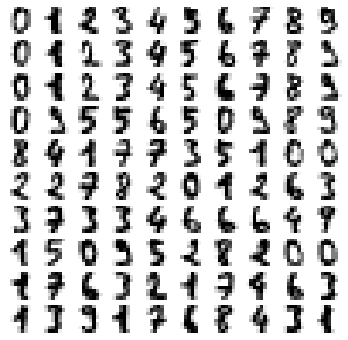

In [16]:
import matplotlib

plt.figure(figsize=(6, 6))
for i in range(100): 
  plt.subplot(10, 10, i+1)
  plt.imshow(x[i].reshape(8, 8),interpolation='nearest', cmap=matplotlib.cm.binary)
  plt.axis('off')
plt.show()

## 3.予習
今回は手書き文字のデータセット(sklearn.datasetsにあるdigitsデータ)の扱い方について学習した。今回データの扱いや可視化等を学習したが、それだけでは少々物足りない。今回も次回以降の予習になると思われるが、分類器を用いた教師あり学習を実装してみる。前回の課題ではサポートベクトルマシンを用いたが、今回もその手法で学習を行ってみる。

### 用いるアリゴリズム
サポートベクトルマシン support vector machine

まずはデータセットの読み込みを行う

In [17]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt 

#データセットの読み込み
digits = datasets.load_digits()
x = digits.data
y = digits.target
x.shape
#出力によると、データ数1797個 特徴量の個数64個

(1797, 64)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC

#データセットの分割を行う (70%をtrainingデータ 30%をtestデータにする)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
svm = SVC(kernel='rbf',C=1)
#学習を行う
svm.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svmのpredict関数で最終的に機械が文字を何と認識したのか確かめる。そして、データ数1797個のうちどのくらい正解したのか表す正答率を計算してみる。

In [19]:
y_train_pred = svm.predict(x_train) #training dataの予測値
y_test_pred = svm.predict(x_test) #test dataの予測値

print("Accuracy of training data: ",accuracy_score(y_train,y_train_pred))
print("Accuracy of test data: ",accuracy_score(y_test,y_test_pred))

Accuracy of training data:  0.9960222752585521
Accuracy of test data:  0.987037037037037


### データの可視化

正答率はわかったが、具体的にどの数字でご認識を起こしたか可視化してみる

Michine misjudged 8 as 5


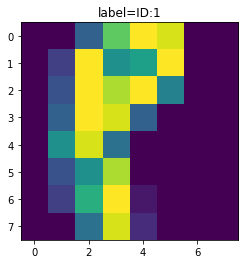



Michine misjudged 8 as 1


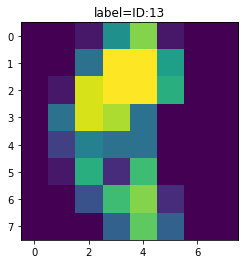



Michine misjudged 5 as 6


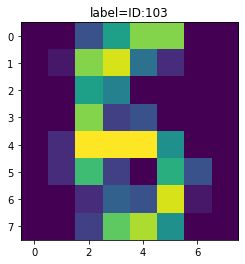



Michine misjudged 9 as 8


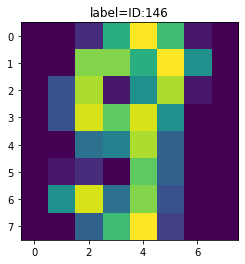



Michine misjudged 5 as 9


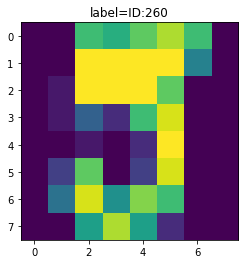



Michine misjudged 8 as 1


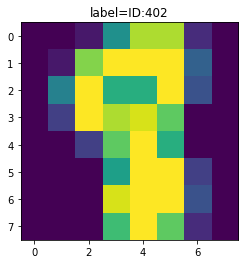



Michine misjudged 8 as 9


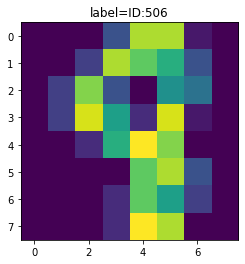

In [20]:
#test dataの中から機械と人間が数字を何と判断したか可視化する

for i in range(x_test.shape[0]):
  x_id = x_test[i].reshape(8,8)
  #正解ラベル
  y_correct = y_test[i]
  y_predict = y_test_pred[i]

  if y_correct != y_predict:
    print("Michine misjudged {} as {}".format(y_correct,y_predict))
    plt.imshow(x_id)
    plt.title("label=ID:"+str(i))
    plt.show()
    print("\n")

一見人間の目からしても間違えてしまうような数字をご認識していることがわかる。画像のpx数を上げると結果は向上するのだろうか

### 結果
上より、サポートベクトルマシンを用いるとデータの分類の正答率は訓練・検証ともに99%を超えることがわかった。ご認識を起こした数字は可視化をした図から5 7 8などである。

## 工夫した点
今回はデータ分析はもちろんデータについての理解を深める課題にも取り組んだ。授業ではdigits,irisデータを扱ったが、自主課題ではboston data と breast_cancer　データを扱った。データの構成やなんのデータが格納されているか調べながら学習した。その他、データの可視化等にも力を入れた。扱ったデータのどれもが多次元の特徴量データであるので、2次元データとしてプロットするためには組み合わせをいくつか取るしかない。中盤ではデータの可視化の方法に工夫を凝らしてみた。defaultではカラフルなdigits図がプロットされるが、図のサイズが大きかったり色が見にくかったなどがあった。そこでサイズを下げて白黒にすることで見えやすくなるのではないかと思い実験してみた。結果少しは見えやすくなったと思う。しかし機械が認識するには我々が見えやすい見えにくいは関係ないので、あくまで人にとってデータを見やすくする工夫にしかならない。最後に次回以降の予習として多クラス分類をscikit learnのsupport vector machineを用いて行った。詳しいことは次回以降でまたレポートにする予定である。